In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
import scipy.stats as stats
import cloveFunctions as clv
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import warnings
warnings.filterwarnings('ignore')

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Compare ALL breast ccle cells with ALL tcga brca samples

In [ ]:
# FIND data_large/brca_1M_clove.tab.gz
# GET ccle an tcga samples that are all missing the top genes' (common context)
# RESTRICT to these cell lines and samples for scatterplot

# ...FOR LATER: apply the same restrictive comparison between cell line (or samples) and cell lines with demeter scores 

## Compare ALL breast ccle cells with ALL tcga brca samples

In [4]:
# load TCGA BRCA data
het_results = pd.read_csv('data_large/brca_1M_clove.tab.gz', compression='gzip', sep='\t')


In [5]:
# # compute CCLE BRCA cloves
# bexp, bcnv = clv.load_data(expdf_fh='data/breast_mrna_df.pickle', cnvdf_fh='data/breast_CCLE_DEL_calls.csv.gz')
# bexp, bcnv = clv.mainFitler(expdf=bexp, cnvdf=bcnv, var=0.2, n=7)
# scores = clv.randomPairContextStat(1000000, bexp, bcnv, permute=True)

# or you could just load some...
scores = pd.read_pickle('data/breast_ttest_nonull_n2v8.p')

In [6]:
# verticies (exp genes) with most significant egdes (to cnv genes)
# TCGA BRCA

print((het_results.shape[0] - het_results[het_results['np_p_w'] < 0.001].shape[0])/ het_results.shape[0], "p=0.001 cutoff loss")

pd.DataFrame(het_results.groupby(['exp']).size(), columns=['count']).sort_values(by='count', ascending=False).head(20).transpose()

0.8371085226673588 p=0.001 cutoff loss


exp,AIM1,OR6T1,ISOC2,DNAJC17,ANKMY1,RPL18,FZD1,C9orf7,TMEM198,TMEM232,VAC14,RPRD1A,NAA20,MT4,ATP6AP1L,FATE1,SH3BGRL2,CCNT1,GABRA2,TBCB
count,77,76,76,76,75,75,75,74,74,74,73,72,72,72,72,72,72,72,72,72


In [7]:
# top/bot 10k clove t-stats

#ccle
scores['type'] = 'CCLE'
ccle_top = scores.sort_values(by='np_t_w', ascending=False).head(10000)[['exp','cnv','np_t_w','np_p_w','type']]
ccle_bot = scores.sort_values(by='np_t_w', ascending=True).head(10000)[['exp','cnv','np_t_w','np_p_w','type']]

#tcga
het_results['type'] = 'TCGA'
tcga_top = het_results.sort_values(by='np_t_w', ascending=False).head(10000)[['exp','cnv','np_t_w','np_p_w','type']]
tcga_bot = het_results.sort_values(by='np_t_w', ascending=True).head(10000)[['exp','cnv','np_t_w','np_p_w','type']]



In [8]:
box_data_top = pd.concat([pd.DataFrame(ccle_top), pd.DataFrame(tcga_top)])
box_data_bot = pd.concat([pd.DataFrame(ccle_bot), pd.DataFrame(tcga_bot)])

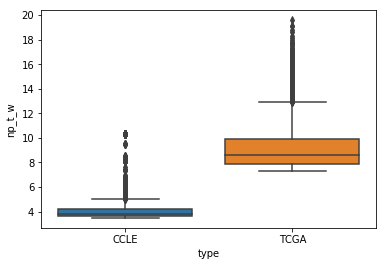

In [9]:
%matplotlib inline
sns.boxplot(x='type', y='np_t_w', data=box_data_top)

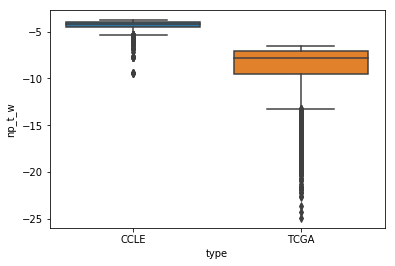

In [10]:
%matplotlib inline
sns.boxplot(x='type', y='np_t_w', data=box_data_bot)

In [11]:
#reindex both TCGA and CCLE results df, and reset index for calculations
het_results['pair'] = het_results['exp'] + ' : ' + het_results['cnv']
tcga = pd.DataFrame(het_results.set_index('pair')[['np_t_w','np_p_w']])
tcga.columns = [['TCGA','TCGA_p']]

scores['pair'] = scores['exp'] + ' : ' + scores['cnv']
ccle = pd.DataFrame(scores.set_index('pair')[['np_t_w','np_p_w']])
ccle.columns = [['CCLE','CCLE_p']]

merged = pd.merge(tcga, ccle, how='inner', left_index=True, right_index=True)

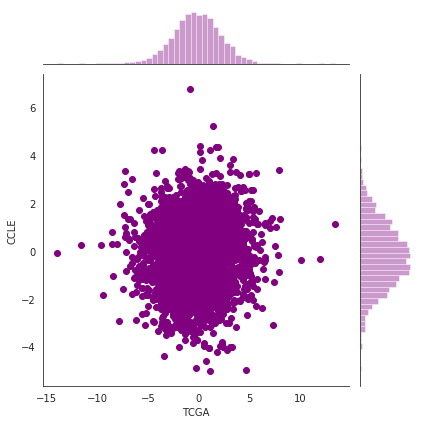

In [18]:
%matplotlib inline
sns.jointplot(data=merged, x='TCGA', y='CCLE', color='purple')

In [19]:
merged['abs_diff'] = abs(merged['TCGA'] - merged['CCLE'])
merge_sort = merged.sort_values(by='abs_diff', ascending=False)
merge_sort.head()

,TCGA,TCGA_p,CCLE,CCLE_p,abs_diff
pair,,,,,
CXXC5 : PCDHA3,-13.956903,8.875892e-41,-0.095573,0.924195,13.861330
DSC2 : PCDHA9,13.463492,2.871081e-38,1.099284,0.277243,12.364208
SOX11 : GTF2H2D,11.991679,3.622799e-31,-0.328554,0.745125,12.320233
EXPH5 : MIR4301,-11.596465,2.301138e-29,0.225304,0.822578,11.821769
NME5 : BCL6B,-7.260459,7.434919e-13,3.325410,0.003764,10.585869


In [20]:
merge_sort[merge_sort['abs_diff'] < 0.75].sort_values(by='TCGA', ascending=False).head(20)

,TCGA,TCGA_p,CCLE,CCLE_p,abs_diff
pair,,,,,
FGFR4 : SCIMP,3.630096,0.000297,3.297681,0.002160,0.332414
NES : COG3,3.383762,0.000741,3.835328,0.000962,0.451566
HOPX : P2RX1,3.103251,0.001965,3.582139,0.004302,0.478888
FGFR4 : CTC1,3.051727,0.002332,3.297681,0.002160,0.245954
NFE2L3 : TLR8-AS1,2.821699,0.004866,2.223654,0.033354,0.598045
FERMT1 : NEK5,2.808296,0.005072,2.768342,0.008420,0.039955
SFTPA2 : ICMT,2.801635,0.005177,2.395094,0.032381,0.406541
FBP1 : CWF19L2,2.787285,0.005410,2.051096,0.047389,0.736189
ELL3 : TIAM2,2.759418,0.005890,2.425599,0.018472,0.333819


In [132]:
model = pd.ols(y=merge_sort.TCGA, x=merge_sort.CCLE)
merge_sort['resid'] = model.resid
merge_sort['resid_abs'] = abs(merge_sort['resid'])

merge_sort.to_csv('tcga_vs_ccle_BRCA', compression='gzip')

#indices to annotate
merge_sort[(merge_sort['TCGA_p'] < 0.1) &
          (merge_sort['CCLE_p'] < 0.1)].sort_values(by='resid_abs', ascending=True)[['TCGA','TCGA_p','CCLE','CCLE_p','resid']].head(20)

,TCGA,TCGA_p,CCLE,CCLE_p,resid
pair,,,,,
DCUN1D5 : GPS2,2.439519,1.486934e-02,2.21486,0.0307824,0.293465
ADNP : SNORD116-29,2.325801,2.021640e-02,1.90995,0.0611765,0.368200
MRPS26 : MLEC,2.582179,9.950587e-03,1.99818,0.0504759,0.570044
CTCF : INCENP,2.613891,9.078162e-03,1.80309,0.0766609,0.722335
TTC35 : RANBP10,-1.726621,8.452607e-02,-2.37435,0.0209702,-1.036254
PCGF2 : ZNF430,1.812377,7.020968e-02,-1.74099,0.0870806,2.111291
FTSJ2 : SEC31B,4.026033,6.074862e-05,1.70588,0.0934743,2.194558
CTBS : NPS,-2.841394,4.577404e-03,-2.14075,0.0365841,-2.295401
PROSC : USP45,4.337250,1.579867e-05,1.76244,0.0833561,2.470818


## COMPARE LUADs (TCGA and CCLE)

In [ ]:
# select LUAD data from 

luad_samples = list(pd.read_json('LUAD_cases_2018-03-23.json')['submitter_id'])
exp = pd.read_csv('exp_tab.gz', compression='gzip', sep='\t', error_bad_lines = False )
cnv = pd.read_csv('cnv_tab.gz', compression='gzip', sep='\t', error_bad_lines = False )

luad_cnv, luad_exp = clv.tcgaTissueSelect(luad_samples, 'luad', cnv, exp)

In [3]:
luad_samples = list(pd.read_json('LUAD_cases_2018-03-23.json')['submitter_id'])

mylist = []
for chunk in  pd.read_csv('exp_tab.gz', compression='gzip', chunksize=20000):
    mylist.append(chunk)
exp = pd.concat(mylist, axis= 0)
del mylist

CParserError: Error tokenizing data. C error: out of memory

## Graph context splits

In [11]:
lungcnv = pd.read_pickle('data/lung_cnv_df.pickle')
lung

In [8]:
calls = pd.read_pickle('data_large/CCLE_DEL_calls.pickle')
lungexp = pd.read_pickle'data/lung_mrna_df.pickle')
lung

In [10]:
lungcnv, lungexp = clv.ccleTissueSelect('data/lung_mrna_df.pickle',  'data_large/CCLE_DEL_calls.pickle',
                                        'data_large/ccle_cell_info_df.pickle', 'LUNG',

In [6]:
lungcnv

,A549_LUNG,ABC1_LUNG,BEN_LUNG,CAL12T_LUNG,CALU1_LUNG,CALU3_LUNG,CALU6_LUNG,CHAGOK1_LUNG,COLO668_LUNG,CORL105_LUNG,...,SKLU1_LUNG,SKMES1_LUNG,SQ1_LUNG,SW1271_LUNG,SW1573_LUNG,SW900_LUNG,T3M10_LUNG,TIG3TD_LUNG,VMRCLCD_LUNG,VMRCLCP_LUNG
1/2-SBSRNA4,5.633033,5.154572,5.606490,5.346757,NaN,5.178634,5.195613,5.514553,5.242598,5.657288,...,5.162919,5.631921,5.735848,NaN,5.129387,NaN,5.901084,5.756381,4.841043,5.332651
A1BG,NaN,NaN,NaN,NaN,5.742799,NaN,NaN,NaN,NaN,6.764142,...,NaN,8.128271,NaN,7.041058,NaN,NaN,NaN,7.508867,4.565744,5.906953
A1BG-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1CF,NaN,NaN,7.185168,NaN,NaN,NaN,NaN,NaN,6.319116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.544876,NaN
A2LD1,6.150974,5.587248,NaN,6.151544,NaN,NaN,6.712795,NaN,5.619048,6.531847,...,6.048860,6.131502,NaN,5.966177,5.776258,5.669145,5.996388,6.449796,NaN,5.580346
A2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2ML1,NaN,NaN,NaN,6.625752,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.582748,NaN,NaN,NaN
A4GALT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4GNT,NaN,NaN,4.025824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


compute exactly the same clove pairs as another clove results df
(computed in ccle_sandbox)

mean:  7.964873906330417
std:  11.298861660411463


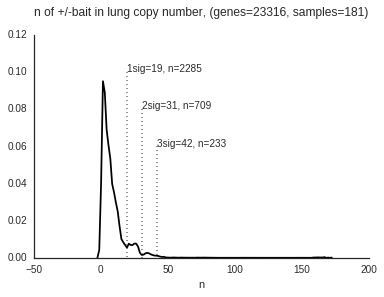

In [67]:
graph_n_dist(pd.read_pickle('data/lung_cnv_df.p'), 'lung', yloc='manual')

In [39]:
sns.distplot?


In [6]:
matchdf = pd.read_csv('data/tcga_lung_cloves.tab.gz', compression='gzip', sep='\t', index_col=0)

In [6]:
def allPairContextStat(expdf, cnvdf, nan_style='omit', permute=False, save='data_large/'):
    """
    computes all pairs (post filtering) 
    """
    
    cells = list(set(cnvdf.columns).intersection(expdf.columns))
    expdf = expdf[cells]
    cmask = cnvdf[cells] == 1
    
    if permute:
        if 'cn' in permute or 'copy number' in permute:
            cmask_n = scrambleDF(cmask)
            permute = 'cnv'
        if 'rna' in permute or 'exp' in permute or 'expression' in permute:
            expdf_n = scrambleDF(expdf)
            permute = 'exp'
        else:
            permute = 'cnv'
            cmask_n = scrambleDF(cmask)
    d = []    
    comparisons = len(expdf.index) * len(cnvdf.index)
    print('attempting {} comparisons with current parameters'.format(comparisons))
    count=0
    percent_complete=0
    
    for n in itertools.product(expdf.index, cnvdf.index):
        pos = np.array(expdf.loc[n[0]][cmask.loc[n[1]]])
        neg = np.array(expdf.loc[n[0]][~cmask.loc[n[1]]])
        t, p = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)    
        if permute=='cnv':
            pos = np.array(expdf.loc[n[0]][cmask_n.loc[n[1]]])
            neg = np.array(expdf.loc[n[0]][~cmask_n.loc[n[1]]])
            t_n, p_n = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)
            d.append({'count': count, 'exp': n[0], 'cnv':n[1], 'np_t_w':t, 'np_p_w':t,'np_t_w_null':t_n})
        elif permute=='exp':
            pos = np.array(expdf_n.loc[n[0]][cmask.loc[n[1]]])
            neg = np.array(expdf_n.loc[n[0]][~cmask.loc[n[1]]])
            t_n, p_n = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)
            d.append({'count': count, 'exp': n[0], 'cnv':n[1], 'np_t_w':t, 'np_p_w':t,'np_t_w_null':t_n})
        else: 
            d.append({'count': count, 'exp': n[0], 'cnv':n[1], 'np_t_w':t, 'np_p_w':t})
            
        # counter
        count+=1
        print(count)
        if count == 10:
            break
        if count%(comparisons/10)==0:
            percent_complete+=10
            print('pair computation {}% complete ({}/{})'.format(percent_complete, count, comparisons))
    
    df = pd.DataFrame(d)
    if save:
        df.to_csv(save, sep='\t', compression='gzip')
    return df

In [9]:
from cloveFunctions import scrambleDF
import itertools
lung_results = allPairContextStat(lungexp, lungcnv, permute='exp', save='data_large/lung_ccle_clove.tab.gz')
lung_results.to_csv('data_large/lung_ccle_clove_all.tab.gz', sep='\t', compression='gzip')

attempting 15492271 comparisons with current parameters
1
2
3
4
5
6
7
8
9
10


In [22]:
lung_results

NameError: name 'lung_results' is not defined

In [7]:
lung_results.to_csv('data_large/lung_ccle_clove_all.tab.gz', sep='\t', compression='gzip')

NameError: name 'lung_results' is not defined

In [ ]:
lung_results = clv.allPairContextStat

## Compare BREAST/BRCA

below is just for ones I already computed no attempt to match

In [7]:
%matplotlib inline
ccle = pd.read_csv('data/breast_ttest_real_samp.tab.gz', compression='gzip', index_col=0, sep='\t')[['exp','cnv','np_t_w','np_p_w']]
ccle.columns = ['exp','cnv','t_ccle','p_ccle']
tcga = pd.read_csv('data/brca_1M_clove.tab.gz',  compression='gzip', index_col=0, sep='\t')[['exp','cnv','np_t_w','np_p_w']]
tcga.columns = ['exp','cnv','t_tcga','p_tcga']

brdf = pd.merge(left=ccle, right=tcga, left_on=['exp','cnv'], right_on=['exp','cnv'])

def graph_clove_clove(df, x='t_ccle_lung', y='t_tcga_lung'):
    s1_ccle = np.std(df[x])*1.5
    s1_tcga = np.std(df[y])*1.5

    sns.set_style("white")
    sns.scatterplot(x=df[x], y=df[y])
    plt.plot([s1_ccle,s1_ccle], [df[y].max(), df[y].min()], linestyle='dotted', color='gray')
    plt.plot([df[x].max(), df[x].min()],[s1_tcga,s1_tcga],  linestyle='dotted', color='gray')
    sns.despine()
    
    df = df[(df[y]>s1_tcga) & (df[x]>s1_ccle)]
    df['prod'] = df[x] * df[y]
    
graph_clove_clove(brdf, x='t_ccle', y='t_tcga')

FileNotFoundError: [Errno 2] No such file or directory: 'data/brca_1M_clove.tab.gz'

In [ ]:
matchdf = pd.read_csv('data/breast_ttest_real_samp.tab.gz')